In [1]:
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.visualization import plot_histogram, plot_bloch_multivector, plot_state_qsphere, plot_gate_map
from qiskit.quantum_info import Statevector
from qiskit.providers.fake_provider import GenericBackendV2
from qiskit.compiler import transpile
from qiskit_aer import AerSimulator
from numpy import sqrt, array
import graphviz
from qiskit.visualization import plot_coupling_map
import matplotlib.pyplot as plt

In [2]:
def run_circuit(circuit, num_qubits=3, coupling_map=[[0,1],[1,2], [1,0], [2,1]]):
    device_backend = GenericBackendV2(num_qubits=num_qubits, coupling_map=coupling_map)
    backend = AerSimulator.from_backend(device_backend)
    result = backend.run(circuit).result()
    counts_noise = result.get_counts(0)
    return counts_noise, backend


# Task 3.2a)

-> QuantumCurcuit(numberOfQubits, numberOfClassicalBits) <br>
-> x() <br>
-> measure(qubit,bit)

In [3]:
circuit = QuantumCircuit(1,1)
circuit.x(0)
circuit.measure(0,0)
circuit.draw()

┌───┐┌─┐
  q: ┤ X ├┤M├
     └───┘└╥┘
c: 1/══════╩═
           0

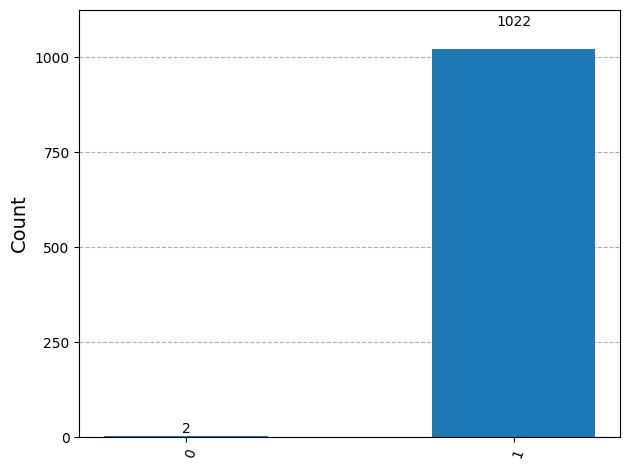

In [4]:
counts_noise, backend = run_circuit(circuit)
plot_histogram(counts_noise, title="")

# Task 3.2 b) c)

### Creating a quantum circuit and entangling the q0 and q2

In [12]:
qc = QuantumCircuit(3)
qc.h(0)
qc.cx(0,2)
qc.draw()

┌───┐     
q_0: ┤ H ├──■──
     └───┘  │  
q_1: ───────┼──
          ┌─┴─┐
q_2: ─────┤ X ├
          └───┘

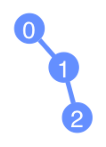

In [13]:
plot_coupling_map(backend.num_qubits, qubit_coordinates=None, coupling_map=backend.coupling_map.get_edges())

### Entangling q0, q1 and q2

In [14]:
quantum_circuit = QuantumCircuit(3)
quantum_circuit.h(0)
quantum_circuit.cx(0,1)
quantum_circuit.cx(0,2)
quantum_circuit.cx(1,2)
quantum_circuit.draw()

┌───┐               
q_0: ┤ H ├──■────■───────
     └───┘┌─┴─┐  │       
q_1: ─────┤ X ├──┼────■──
          └───┘┌─┴─┐┌─┴─┐
q_2: ──────────┤ X ├┤ X ├
               └───┘└───┘

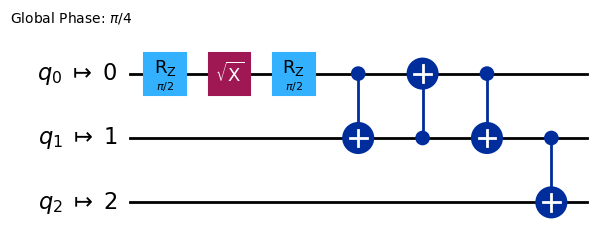

In [15]:
# TODO: Implement Entanglement Circuit (b: entangle qubits 0 and 2, c: entangle qubits 0,1 and 2)

transpiled_circuit = transpile(qc, backend, initial_layout= [0,1,2])
transpiled_circuit.draw('mpl', style="iqp")